### Plot faculty hiring distribution by university

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary_versus_per_capita.pickle')

In [4]:
university_df[:20]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER,regional_income
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,55783.941620,493,56167.948559,55205.642506,48297.784952,48630.258492,47797.093079,74762.608722
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186,95460.436662
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3,56659.816586,680,56987.933045,56164.312487,49056.118257,49340.201770,48627.110378,74762.608722
3,6.0,Columbia University,USA,4.0,13.0,6.0,9.0,13.0,13.0,11.0,12.0,4.0,96.14,2015.0,190150,Columbia University in the City of New York,Columbia University,West 116 St and Broadway,New York,NY,10027,36,2,Lee C. Bollinger,President,2128541754,603800000,049179401|621889815,270700,1,www.columbia.edu/,www.columbia.edu/content/admissions,sfs.columbia.edu/,https://www.columbia.edu/content/admissions-of...,cc-seas.financialaid.columbia.edu/estimate-cost,gs.columbia.edu/veterans,,https://health.columbia.edu/content/disability...,2,1,2,9,1,1,11,1,2,2,1,2,11,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,15,6,17,15,15,15,2,5,2,-2,-2,35620,1,408,-2,36061,New York Co

### Hiring

In [5]:
Business_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_edgelist.txt', sep='\t')
Business_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_vertexlist.txt', sep='\t')
ComputerScience_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_edgelist.txt', sep='\t')
ComputerScience_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_vertexlist.txt', sep='\t')
History_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_edgelist.txt', sep='\t')
History_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_vertexlist.txt', sep='\t')

In [6]:
len(History_vertexlist)

145

#### History

In [7]:
match_dict = {"University of Michigan":"University of Michigan, Ann Arbor",
"University of Wisconsin, Madison":"University of Wisconsin–Madison",
"University of Minnesota, Minneapolis":"University of Minnesota, Twin Cities",
"University of Illinois, Urbana Champaign":"University of Illinois at Urbana–Champaign",
"Purdue University":"Purdue University, West Lafayette",
"Ohio State University":"Ohio State University, Columbus",
"University of North Carolina, Chapel Hill":"University of North Carolina at Chapel Hill",
"Washington University, St. Louis":"Washington University in St. Louis",
"University of Texas, Austin":"University of Texas at Austin",
"University of Pittsburgh":"University of Pittsburgh - Pittsburgh Campus",
"Pennsylvania State University":"Pennsylvania State University, University Park",
"University of Washington":"University of Washington - Seattle",
"Indiana University":"Indiana University",
"University of Colorado, Boulder":"University of Colorado Boulder",
"UC Irvine":"University of California, Irvine",
"State University of New York, Buffalo":"University at Buffalo, The State University of New York",
"University of Texas, Dallas":"University of Texas at Dallas",
"University of Massachusetts, Amherst":"University of Massachusetts Amherst",
"Texas A&M":"Texas A&M University, College Station",
"Claremont Graduate University":"",
"University of South Carolina":"University of South Carolina - Columbia",
"University of Oklahoma":"University of Oklahoma - Norman Campus",
"Rutgers University":"Rutgers University-New Brunswick",
"University of Kansas, Lawrence":"University of Kansas",
"Louisiana State University":"Louisiana State University - Baton Rouge",
"University of Arkansas, Fayetteville":"University of Arkansas - Fayetteville",
"University of Alabama, Tuscaloosa":"University of Alabama - Tuscaloosa",
"Oklahoma State University":"Oklahoma State University–Stillwater",
"State University of New York, Binghamton":"Binghamton University",
"CUNY Baruch College":"",
"University of Hawaii, Manoa":"University of Hawaii at Manoa",
"University of Mississippi":"University of Mississippi - Oxford Campus",
"University of Missouri, St. Louis":"University of Missouri–St. Louis",
"Worcester Polytechnic Institute":"",
"Fordham University":"",
"Santa Clara University":"",
"Rollins College":"",
"Miami University, Ohio":"Miami University",
"Bentley University":"",
"Texas Christian University":"",
"Abilene Christian University":"",
"Babson College":"",
"Pepperdine University":"",
"Thunderbird School of Global Management":"",
"DePaul University":"",
"Hofstra University":"",     
"University of Toronto":"",
"UC San Diego":"University of California, San Diego",
"State University of New York, Stony Brook":"Stony Brook University",
"University of British Columbia":"",
"UC Santa Barbara":"University of California, Santa Barbara",
"University of Waterloo":"",
"McGill University":"",
"CUNY Graduate Center":"",
"University of Montreal":"",
"Simon Fraser University":"",
"University of Illinois, Chicago":"University of Illinois at Chicago",
"Stevens Institute of Technology":"",
"McMaster University":"",
"University of Alberta":"",
"Polytechnic Institute of NYU":"",
"University of Calgary":"",
"University of Louisiana, Lafayette":"",
"University of Western Ontario":"",
"Carleton University":"",
"Queens University":"",
"University of Wisconsin, Milwaukee":"University of Wisconsin–Milwaukee",
"University of Texas, Arlington":"University of Texas at Arlington",
"University of Ottawa":"",
"Oregon Health and Science University":"Oregon Health & Science University",
"State University of New York, Albany":"University at Albany, SUNY",
"University of South Florida":"University of South Florida - Tampa",
"Colorado State University":"Colorado State University - Fort Collins",
"University of Colorado, Denver":"University of Colorado Denver",
"Toyota Technological Institute at Chicago":"",
"University of Manitoba":"",
"University of Regina":"",
"University of Nebraska, Lincoln":"University of Nebraska–Lincoln",
"University of Saskatchewan":"",
"University of Texas, San Antonio":"University of Texas at San Antonio",
"Oakland University (Michigan)":"Oakland University",
"University of Maine":"University of Maine, Orono",
"University of Victoria":"",
"Concordia University, Montreal":"",
"University of Missouri, Kansas City":"University of Missouri–Kansas City",
"University of Missouri, Columbia":"University of Missouri–Columbia",
"Dalhousie University":"",
"Worcester Polytechnic Institute":"",
"University of Texas, El Paso":"University of Texas at El Paso",
"Naval Postgraduate School":"",
"University of Massachusetts, Boston":"University of Massachusetts Boston",
"York University":"",
"Southern Illinois University, Carbondale":"Southern Illinois University Carbondale",
"Claremont Graduate University":"",
"Catholic University of America":"",
"University of Massachusetts, Lowell":"University of Massachusetts Lowell",
"University of North Carolina, Charlotte":"University of North Carolina at Charlotte",
"University of Alabama, Birmingham":"University of Alabama at Birmingham",
"Santa Clara University":"",
"Montana State University":"Montana State University - Bozeman",
"University of New Brunswick":"",
"Wright State University":"Wright State University - Dayton",
"Western Michigan University":"",
"University of Alabama, Huntsville":"University of Alabama in Huntsville",
"University of Idaho, Moscow":"University of Idaho",
"Texas Tech University":"Texas Tech University (TTU)",
"University of Tulsa":"",
"Long Island University":"",
"University of Colorado, Colorado Springs":"",
"Memorial University of Newfoundland":"",
"DePaul University":"",
"Nova Southeastern University":"",
"University of Bridgeport":"",
"University of Nebraska, Omaha":"University of Nebraska Omaha",
"University of Arkansas, Little Rock":"",
"New Mexico Institute of Mining and Technology":"",

"All others":"",}

In [8]:
match_list = []
for idx, row in Business_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.institution.values:
            match = row.institution
        else:
            for alias_list in university_df.IALIAS.values:
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
Business_vertexlist['institution_name'] = match_list

# merge
Business_vertexlist = Business_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.institution.isnull() == False][["national_rank", "institution"]],
    left_on="institution_name",
    right_on="institution",
)

# count n hires
n_hires = []
for vertex in Business_vertexlist["# u"].values:
    n_hires.append(np.sum(Business_edgelist["# u"].values == vertex))
Business_vertexlist['n_hires'] = n_hires

"Claremont Graduate University":"",
"CUNY Baruch College":"",
"Worcester Polytechnic Institute":"",
"Fordham University":"",
"Santa Clara University":"",
"Rollins College":"",
"Bentley University":"",
"Texas Christian University":"",
"Abilene Christian University":"",
"Babson College":"",
"Pepperdine University":"",
"Thunderbird School of Global Management":"",
"DePaul University":"",
"Hofstra University":"",
"All others":"",


In [9]:
#[i for i in [j for j in university_df.institution.values if type(j) == str] if "Minnesota" in i]

In [10]:
Business_vertexlist.sort_values(by='national_rank')

,# u,institution_name,national_rank,institution,n_hires
1,3,Harvard University,1.0,Harvard University,344
0,1,Stanford University,2.0,Stanford University,412
7,10,Columbia University,4.0,Columbia University,185
3,6,University of Chicago,6.0,University of Chicago,264
4,7,Cornell University,8.0,Cornell University,170
...,...,...,...,...,...
82,95,Portland State University,192.0,Portland State University,1
86,101,Rochester Institute of Technology,196.0,Rochester Institute of Technology,0
85,100,Howard University,200.0,Howard University,3
71,81,University of Missouri–St. Louis,203.0,University of Missouri–St. Louis,2


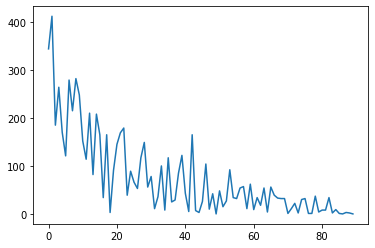

In [11]:
plt.plot(Business_vertexlist.sort_values(by='national_rank').n_hires.values)

##### CS

In [12]:
match_list = []
for idx, row in ComputerScience_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.institution.values:
            match = row.institution
        else:
            for alias_list in university_df.IALIAS.values:
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
ComputerScience_vertexlist['institution_name'] = match_list

# merge
ComputerScience_vertexlist = ComputerScience_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.institution.isnull() == False][["national_rank", "institution"]],
    left_on="institution_name",
    right_on="institution",
)

# count n hires
n_hires = []
for vertex in ComputerScience_vertexlist["# u"].values:
    n_hires.append(np.sum(ComputerScience_edgelist["# u"].values == vertex))
ComputerScience_vertexlist['n_hires'] = n_hires

"University of Toronto":"",
"University of British Columbia":"",
"University of Waterloo":"",
"McGill University":"",
"CUNY Graduate Center":"",
"University of Montreal":"",
"Simon Fraser University":"",
"Stevens Institute of Technology":"",
"McMaster University":"",
"University of Alberta":"",
"Polytechnic Institute of NYU":"",
"University of Calgary":"",
"University of Louisiana, Lafayette":"",
"University of Western Ontario":"",
"Carleton University":"",
"Queens University":"",
"University of Ottawa":"",
"Toyota Technological Institute at Chicago":"",
"University of Manitoba":"",
"University of Regina":"",
"University of Saskatchewan":"",
"University of Victoria":"",
"Concordia University, Montreal":"",
"Dalhousie University":"",
"Worcester Polytechnic Institute":"",
"Naval Postgraduate School":"",
"York University":"",
"Claremont Graduate University":"",
"Catholic University of America":"",
"Santa Clara University":"",
"University of New Brunswick":"",
"Western Michigan University"

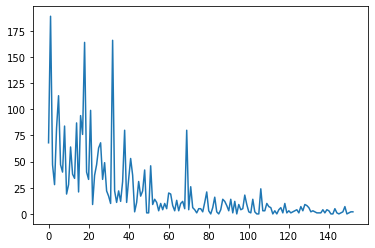

In [13]:
plt.plot(ComputerScience_vertexlist.sort_values(by='national_rank').n_hires.values)

In [14]:
#[i for i in [j for j in university_df.institution.values if type(j) == str] if "New Mexico" in i]

### History

In [19]:
match_list = []
for idx, row in History_vertexlist.iterrows():
    match = None
    if row.institution in match_dict.keys():
        match = match_dict[row.institution]
    else:
        if row.institution in university_df.institution.values:
            match = row.institution
        else:
            for alias_list in university_df.IALIAS.values:
                if type(alias_list) == str:
                    alias_list = alias_list.split(', ')
                    if row.institution in alias_list:
                        match = alias_list[alias_list == row.institution]
    if match in ["", None]:
        print('"' + row.institution+'":"",')
    match_list.append(match)
History_vertexlist['institution_name'] = match_list
print(len(History_vertexlist))
# merge
History_vertexlist = History_vertexlist[["# u", "institution_name"]].merge(
    university_df[university_df.institution.isnull() == False][["national_rank", "institution"]],
    left_on="institution_name",
    right_on="institution",
)
print(len(History_vertexlist))
# count n hires
n_hires = []
for vertex in History_vertexlist["# u"].values:
    n_hires.append(np.sum(History_edgelist["# u"].values == vertex))
History_vertexlist['n_hires'] = n_hires

"Catholic University of America":"",
"Claremont Graduate University":"",
"Drew University":"",
"Princeton Theological Seminary":"",
"American University, Washington":"",
"CUNY Graduate Center":"",
"Clark University":"",
"Jewish Theological Seminary of America":"",
"Saint Johns University":"",
"Texas Christian University":"",
"Graduate Theological Union":"",
"Fordham University":"",
"Illinois State University":"",
"Southern Baptist Theological Seminary":"",
"Western Michigan University":"",
"Middle Tennessee State University":"",
"All others":"",
145
121


In [20]:
History_vertexlist

,# u,institution_name,national_rank,institution,n_hires
0,1,Harvard University,1.0,Harvard University,324
1,2,Yale University,9.0,Yale University,307
2,4,Princeton University,7.0,Princeton University,184
3,5,Stanford University,2.0,Stanford University,172
4,6,University of Chicago,6.0,University of Chicago,240
...,...,...,...,...,...
116,139,Texas Tech University (TTU),152.0,Texas Tech University (TTU),0
117,140,University of Memphis,202.0,University of Memphis,1
118,141,Mississippi State University,181.0,Mississippi State University,0
119,142,George Mason University,140.0,George Mason University,0


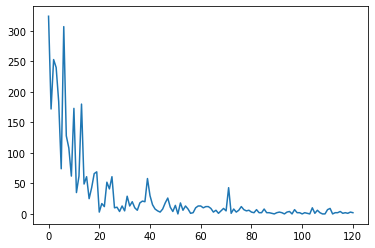

In [21]:
plt.plot(History_vertexlist.sort_values(by='national_rank').n_hires.values)

In [ ]:
### What percent of hires come from top X universities? 